In [38]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
# load and preprocess

train = pd.read_csv('data/mnist_train.csv')
test = pd.read_csv('data/mnist_test.csv')


train_labels = train.iloc[:, 0].values 
train_pixels = train.iloc[:, 1:].values 

test_labels = test.iloc[:, 0].values 
test_pixels = test.iloc[:, 1:].values 

train_pixels = train_pixels / 255.0
test_pixels = test_pixels / 255.0

def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

train_one_hot_labels = one_hot_encode(train_labels)
test_one_hot_labels = one_hot_encode(test_labels)


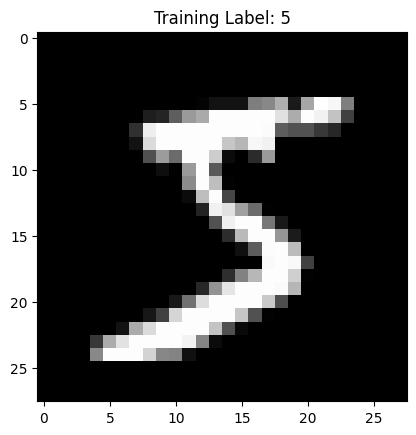

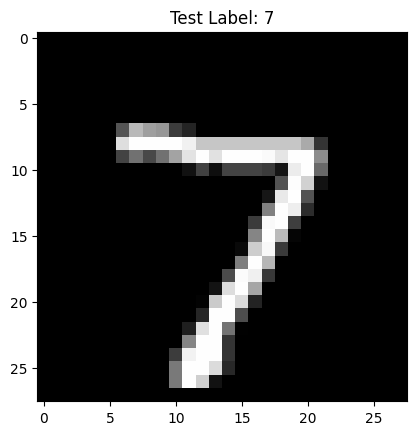

In [40]:
# Visualizing image
index = 0 
plt.imshow(train_pixels[index].reshape(28, 28), cmap='gray')
plt.title(f"Training Label: {np.argmax(train_one_hot_labels[index])}")
plt.show()

index = 0  
plt.imshow(test_pixels[index].reshape(28, 28), cmap='gray')
plt.title(f"Test Label: {np.argmax(test_one_hot_labels[index])}")
plt.show()


In [41]:

input_size = 784
hidden_size = 128
output_size = 10

weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
bias_hidden = np.zeros((1, hidden_size))

weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
bias_output = np.zeros((1, output_size))


In [42]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def forward_pass(X):
    Z1 = np.dot(X, weights_input_hidden) + bias_hidden
    A1 = relu(Z1)
    Z2 = np.dot(A1, weights_hidden_output) + bias_output
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m



In [43]:
# Hyperparameters
epochs = 20
learning_rate = 0.01
batch_size = 64

loss_history = []

# Function to compute gradients and update parameters
def backpropagation(X_batch, y_batch, Z1, A1, Z2, A2):
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

    m = X_batch.shape[0]

    # Output layer gradients
    dZ2 = A2 - y_batch
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Hidden layer gradients
    dA1 = np.dot(dZ2, weights_hidden_output.T)
    dZ1 = dA1 * (Z1 > 0)  # ReLU derivative
    dW1 = np.dot(X_batch.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases
    weights_input_hidden -= learning_rate * dW1
    bias_hidden -= learning_rate * db1
    weights_hidden_output -= learning_rate * dW2
    bias_output -= learning_rate * db2

# Training loop
for epoch in range(epochs):

    indices = np.arange(train_pixels.shape[0])
    np.random.shuffle(indices)
    X_train_shuffled = train_pixels[indices]
    y_train_shuffled = train_one_hot_labels[indices]

    for i in range(0, train_pixels.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Forward pass
        Z1, A1, Z2, A2 = forward_pass(X_batch)

        # Compute gradients and update parameters
        backpropagation(X_batch, y_batch, Z1, A1, Z2, A2)

    _, _, _, train_preds = forward_pass(train_pixels)
    loss = compute_loss(train_one_hot_labels, train_preds)
    loss_history.append(loss)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")


Epoch 1/20, Loss: 0.9885
Epoch 2/20, Loss: 0.5168
Epoch 3/20, Loss: 0.4137
Epoch 4/20, Loss: 0.3690
Epoch 5/20, Loss: 0.3431
Epoch 6/20, Loss: 0.3249
Epoch 7/20, Loss: 0.3097
Epoch 8/20, Loss: 0.2985
Epoch 9/20, Loss: 0.2866
Epoch 10/20, Loss: 0.2769
Epoch 11/20, Loss: 0.2676
Epoch 12/20, Loss: 0.2585
Epoch 13/20, Loss: 0.2507
Epoch 14/20, Loss: 0.2434
Epoch 15/20, Loss: 0.2354
Epoch 16/20, Loss: 0.2287
Epoch 17/20, Loss: 0.2227
Epoch 18/20, Loss: 0.2156
Epoch 19/20, Loss: 0.2093
Epoch 20/20, Loss: 0.2035


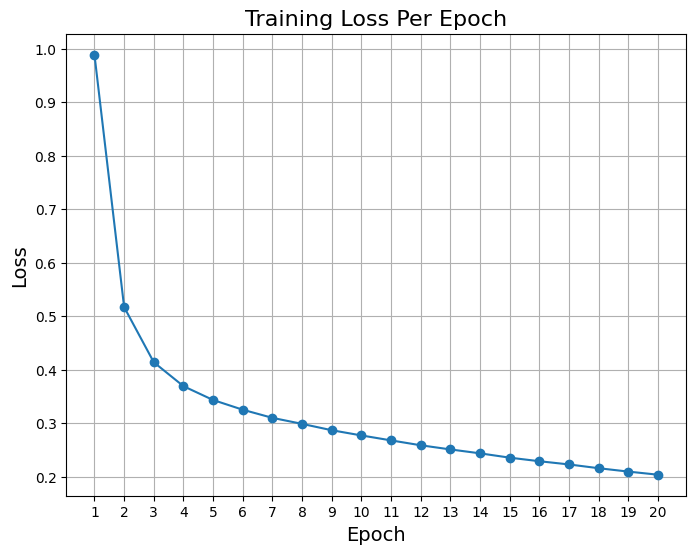

In [44]:
import matplotlib.pyplot as plt

# Plot the loss history
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-')
plt.title('Training Loss Per Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.xticks(range(1, len(loss_history) + 1))
plt.show()


In [45]:
# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_true, axis=1)
    accuracy = np.mean(y_pred_labels == y_true_labels)
    return accuracy

# Evaluate on the test set
_, _, _, test_preds = forward_pass(test_pixels)
test_loss = compute_loss(test_one_hot_labels, test_preds)
test_accuracy = compute_accuracy(test_one_hot_labels, test_preds)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Loss: 0.2038
Test Accuracy: 94.06%
